# Seção 01 - Métricas de avaliação de modelos



Exemplos:
1. Regressão: RMSE, MAE, R²
2. Classificação: AUC, F1, Recall, Precision
3. Agrupamento: KS, Gini 

<img src="../imagens/diagramaDeDecisao.jpg" alt="Diagrama de decisão bem simpifcado" width="600"/>

Esse pequeno notebook será organizado da seguinte maneira:

1. [Métricas de avaliação para problemas de **Regressão**](#Métricas-de-avaliação-de-Regressão)
2. [Métricas de avaliação para problemas de **Classificação**](#Métricas-de-avaliação-de-Classificação)
3. [Métricas de avaliação para problemas de **Agrupamento**](#Métricas-de-avaliação-de-Agrupamento)

## 1. Métricas de avaliação de Regressão
#Métricas-de-avaliação-de-Regressão

As métricas de avaliação em problemas de **regressão** mais comuns são (estão em ordem da minha preferência de uso):
1. RMSE (Root Mean Square Error); 
2. MAE (Mean Absolute Error);
3. MAPE (Mean Absolute Percentage Error);
4. R²;
5. R² Ajustado; e
6. MSE (Mean Square Error)

### 1. RMSE (Root Mean Square Error)

Essa é a métrica que eu tenho visto mais por aí. Um ponto muito importante sobre essa métrica é que a unidade é a mesma da característica, o que facilita a interpretação.

#### Método de cálculo:
$$
RMSE = 	\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{real_i}-\hat{y}_{predito_i})^2}
$$

### 2. MAE (Mean Absolute Error)

A unidade dessa métrica é a mesma da característica, o que facilita a interpretação. No Pocket Curso do Itaú na Poli, foi sugerido que o MAE deve ser usado no treinamento do modelo e o RMSE ou MSE na validação, a aplicação dessas métricas nessa ordem deve-se ao fato de que o **MAE é menos sensível aos outliers que o RMSE**.  

#### Método de cálculo:
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|(y_{real_i}-\hat{y}_{predito_i})|
$$

### 3. MAPE (Mean Absolute Percentage Error)

Similar ao MAE, porém, em porcentagem.

#### Método de cálculo:
$$
MAPE = \frac{1}{n}\sum_{i=1}^{n}\frac{|(y_{real_i}-\hat{y}_{predito_i})|}{y_{real_i}}
$$

Sendo:
$$
y_{real_i} \neq 0
$$

### 4. R² ou coeficiente de determinação
Refere-se a porção da variância da variável dependente/resposta/y que pode ser explicada pelas variáveis independentes/fatores/Xs.

#### Método de cálculo:
$$
R² = 1-\sum_{i=1}^{i}\frac{(y_{real_i}-\hat{y}_{predito_i})^2}{(y_{real_i}-\bar{y})^2}
$$

### 5. R² Ajustado
A cada variável independente acrescentada ao modelo, aumenta o R². Para penalizar a adição indiscriminada de fatores, podemos usar o R² Ajustado. Essa medida penaliza a métrica quando há o aumento de fatores.

#### Método de cálculo:
$$
R²_{Ajustado} = 1-\frac{n-1}{n-(k+1)}(1-R²)
$$
Sendo:

n: quantidade de obsevações ou tamanho da amostra}

k: número de regressores


Lembrando que R² é
$$
R² = 1-\sum_{i=1}^{i}\frac{(y_{real_i}-y_{predito_i})^2}{(y_{real_i}-\bar{y})^2}
$$

### 6. MSE (Mean Square Error)

Similar ao RMSE, porém sem a raiz quadrada. Obviamente, sem a raiz quadrada, a grandeza torna-se o quadrado da dimensão original. 


#### Método de cálculo:
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{real_i}-\hat{y}_{predito_i})^2
$$

## Exemplo de aplicação:

Para testar as métricas acima, usaremos o dataset do Kaggle "Heights and weights - Simple linear regression" (https://www.kaggle.com/tmcketterick/heights-and-weights/download).

In [1]:
# Instruções basiconas de sempre.
# Lidar com dataframes.
import numpy as np
import pandas as pd
# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
# Lidar com preparação de dados.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("../../bases/heights-and-weights.csv")

In [3]:
x = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [4]:
reta_x = np.linspace(min(x)-5, max(x)+5,1000).reshape(-1,1)
reta_y = regressor.predict(reta_x)
reta_df = np.concatenate((reta_x, reta_y), axis=1)
reta_df = pd.DataFrame(reta_df, columns=("Height", "Weight"))

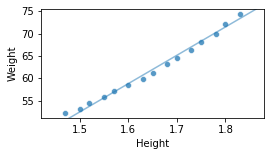

In [5]:
dimensoes = (4,2)
fig, ax = plt.subplots(figsize=dimensoes)
ax.set(xlim = (min(x)-0.05, max(x)+0.05),ylim=(min(y)-1, max(y)+1))
ax = sns.scatterplot(x="Height", y="Weight", data=df, alpha=0.75);
ax = sns.lineplot(x="Height", y="Weight", data=reta_df, alpha=0.5, palette="husl");

In [6]:
len(x_test)

3

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("RMSE: {:.5}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE: {:.5}".format(mean_absolute_error(y_test, y_pred)))
# print("MAPE:, ", mean_absolute_percentage_error(y_test, y_pred))
print("R²: {:.5}".format(r2_score(y_test, y_pred)))

################################################################################
# Cálculo do R2 ajustado:
def r2_ajustado(x_train, y_test, y_pred):
    """
    r2_ajustado retorna o R² Ajustado e recebe como argumento as séries com o
    valor alvo teste e o predito.
    """
    n = x_train.shape[0]
    k = x_train.shape[1]
    return (1-((n-1)/(n-(k+1)))*(1-r2_score(y_test, y_pred)))
################################################################################

print("R² Ajustado: {:.5}".format(r2_ajustado(x_train, y_test, y_pred)))
print("MSE: {:.5}".format(mean_squared_error(y_test, y_pred)))

RMSE: 1.0015
MAE: 0.82073
R²: 0.9783
R² Ajustado: 0.97613
MSE: 1.003


-------------------------------------------------------


## 2. Métricas de avaliação para problemas de **Classificação**

#Métricas-de-avaliação-de-Classificação

A base das métricas de classificação que serão apresentadas é a matriz de confusão, Figura 02 e Figura 03 (Fonte: [Documentação Scikit Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)).

<tr>
    <td>
        <img src="../imagens/sphx_glr_plot_confusion_matrix_001.png" alt="Matriz de confusão" width="400"/>
        <p style="text-align:center">Figura 02 - Matriz de confusão.</p>
    </td>
    <td>
        <img src="../imagens/sphx_glr_plot_confusion_matrix_002.png" alt="Matriz de confusão" width="400"/>
        <p style="text-align:center">Figura 03 - Matriz de confusão normalizada.</p>
    </td>
  </tr>

A matriz de confusão é simplesmente a contagem das ocorrências de cada evento. Observando a Figura 02, temos os seguintes eventos e quantidade de ocorrências:
1. **Setosa** classificada como **Setosa**: 13 ocorrências.
2. **Setosa** classificada como **Versicolor**: 0 ocorrências.
3. **Setosa** classificada como **Virginica**: 0 ocorrências.


4. **Versicolor** classificada como **Setosa**: 0 ocorrências.
5. **Versicolor** classificada como **Versicolor**: 10 ocorrências.
6. **Versicolor** classificada como **Virginica**: 6 ocorrências.


7. **Virginica** classificada como **Setosa**: 0 ocorrências.
8. **Virginica** classificada como **Versicolor**: 0 ocorrências.
9. **Virginica** classificada como **Virginica**: 9 ocorrências.


Já na Figura 03, temos a matriz de confusão **normalizada**.

Da matriz de confusão derivam os seguintes termos:

| Abreviação | Termo | Definição |
|---|---|---|
| **VP ou TP** | Verdadeiro Positivo | Valor real e Valor predito são **POSITIVOS** |
| **FN** | Falso Negativo | Valor real é **POSITIVO** e Valor predito é **NEGATIVO** |
| **FP** | Falso Positivo | Valor real é **NEGATIVO** e Valor predito é **POSITIVO** |
| **VN ou TN** | Verdadeiro Negativo | Valor real e Valor predito são **NEGATIVOS** |

<p style="text-align:center">Tabela 01 - Abreviação, termo e definição dos itens dentro de uma matriz de confusão.</p>

Substituindo-se os termos em um matriz de confusão com duas classes, teremos:

<img src="../imagens/confusion_matrix.PNG" alt="Matriz de confusão" width="250"/>
<p style="text-align:center">Figura 04 - Matriz de confusão e seus termos.</p>
<p style="text-align:center">Fonte: <a href="https://en.wikipedia.org/wiki/Confusion_matrix">Wikipedia</a></p>

<img src="../imagens/confusion_matrix_error_types.PNG" alt="Tipos de erros." width="350"/>
<p style="text-align:center">Figura 05 - Erros tipo I e II.</p>
<p style="text-align:center">Fonte: <a href="https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/">Aula do Professor José Portilla.</a></p>

Da matriz de confusão, podemos tirar as seguintes métricas:

**1. Precisão (Precision):**

Segundo o Prof. Eduardo Vargas Ferreira [Aulas LEG-UFPR](http://cursos.leg.ufpr.br/ML4all/reamostragem/2015/04/18/aula6.html), na **precisão** estamos dando maior importância para o erro do tipo I. Deve-se entender do negócio para entender qual a melhor métrica a ser usada.

$$
Pr = \frac{VP}{FP + VP}
$$


**2. Revocação (Recall):**
Nesse caso, a maior importância está no erro do tipo II.

$$
Re = \frac{VP}{FN + VP}
$$


**3. Acurácia:**

Segundo o Prof. Eduardo Vargas Ferreira [Aulas LEG-UFPR](http://cursos.leg.ufpr.br/ML4all/reamostragem/2015/04/18/aula6.html), na **acurácia** estamos dando o mesmo peso para erros do tipo I e tipo II.

$$
Acc = \frac{VP + VN}{VP + FP + VN + FN}
$$

$$
Acc = \frac{VP + VN}{Total}
$$


**4. Erro:**
$$
E = {1 - Acc}
$$

$$
E = \frac{FP + FN}{Total}
$$

Sendo:
$$
Acc = Acurácia
$$


**5. F1-Score:**

Média harmônica entre **precisão** e **recall**.

$$
F1 = \frac{2 * Pr + Re}{Pr + Re}
$$


**6. F(beta)-Score:**

Média harmônica entre **precisão** e **recall** com um fator beta que dá regula a importância da **precisão** em relação ao problema.

$$
F_\beta = (1+\beta^2)*\frac{Pr + Re}{\beta^2*Pr + Re}
$$

### Exemplo com 3 classes:

Para esse exemplo pegarei o famoso dataset de medidas de flores (creio que as medições foram feitas por Sir Fischer). A ideia é tentar classificar a espécie a partir dos quatro atributos.

In [12]:
import seaborn as sns
from sklearn.model_selection import (train_test_split
                                     , cross_val_score)
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report
                             , roc_curve
                             , roc_auc_score)
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

df_iris = sns.load_dataset('iris')

df_iris.sample(10).T

,120,94,147,144,36,71,15,39,16,32
sepal_length,6.9,5.6,6.5,6.7,5.5,6.1,5.7,5.1,5.4,5.2
sepal_width,3.2,2.7,3,3.3,3.5,2.8,4.4,3.4,3.9,4.1
petal_length,5.7,4.2,5.2,5.7,1.3,4,1.5,1.5,1.3,1.5
petal_width,2.3,1.3,2,2.5,0.2,1.3,0.4,0.2,0.4,0.1
species,virginica,versicolor,virginica,virginica,setosa,versicolor,setosa,setosa,setosa,setosa


In [19]:
x = df_iris.drop("species", axis=1).values
y = df_iris.species.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

classificador = GaussianNB()
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

print("Métrica 1 (Acurácia): {:.5}.\n\n".format(accuracy_score(y_test
                                                           , y_pred
                                                           , normalize=True
                                                           , sample_weight=None)))

print("Métrica 2 (Relatório de classificação):{}\n".format(classification_report(y_test, y_pred)))

print(confusion_matrix(y_test, y_pred))

Métrica 1 (Acurácia): 0.97778.


Métrica 2 (Relatório de classificação):              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


## K-fold cross validation

Um problema que pode ocorrer quando dividimos as bases em treinamento e teste é que dados importantes para determinação do modelo podem ficar no conjunto de teste. Para reduzir esse risco usa-se o **k-fold cross validation**, ilustrado aaixo:

<img src="../imagens/grid_search_cross_validation.png" alt="k-fold cross validation" width="500"/>
        <p style="text-align:center">Figura 05 - Esquema do k-fold cross validation. Fonte: <a href="https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation">Documentação do Scikit learn</a></p>

In [8]:
import pandas as pd
import numpy as np

base = pd.read_csv('../../bases/credit-data.csv')
base.loc[base.age < 0, 'age'] = 40.92
               
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size=0.25,
                                                                                              random_state=0)

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(classe_teste, previsoes, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(classe_teste, previsoes)))

Métrica 1 (Acurácia): 0.938.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500
.


In [9]:
# Agora com cross_validation:

classificador = GaussianNB()

resultados = cross_val_score(classificador, previsores, classe, cv=10)

classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

print("Métrica 1 (Acurácia): {:.3} ± {:.2}".format(resultados.mean(), resultados.std()))

Métrica 1 (Acurácia): 0.924 ± 0.019


In [10]:
# Agora com cross_validation stratified k-fold:

a = np.zeros(5)
b = np.zeros(shape = (previsores.shape[0], 1))

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

resultados = []

for indice_treinamento, indice_teste in kfold.split(previsores, b):
#     print(indice_treinamento.shape, indice_teste.shape)
    classificador = GaussianNB()
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    resultados.append(accuracy_score(classe[indice_teste], previsoes))

resultados = np.asarray(resultados)
print("Métrica 1 (Acurácia): {:.3} ± {:.2}".format(resultados.mean(), resultados.std()))

Métrica 1 (Acurácia): 0.925 ± 0.014


# 3. Métricas de avaliação para problemas de Agrupamento
#Métricas-de-avaliação-de-Agrupamento

Existem três classificações:
1. Internos;
2. Externos; e
3. Relativos.